In [1]:
import maboss
import seaborn as sb
import biolqm

In [3]:
path_to_files = "../bnets/"

In [22]:
maboss.bnet_to_bnd_and_cfg(path_to_files + "Invasion_net_1.bnet", "../maboss_files/model.bnd", "../maboss_files/model.cfg")

In [3]:
import os

def remove_first_two_lines_in_files(folder_path):
    # Get a list of all txt files in the folder
    txt_files = [f for f in os.listdir(folder_path) if f.endswith('.bnet')]
    
    for txt_file in txt_files:
        file_path = os.path.join(folder_path, txt_file)
        
        # Read the content of the file
        with open(file_path, 'r') as file:
            lines = file.readlines()
        
        # Remove the first two lines
        modified_lines = lines[2:]
        
        # Write the modified content back to the file
        with open(file_path, 'w') as file:
            file.writelines(modified_lines)
    
    print(f"Removed the first two lines in {len(txt_files)} files.")

remove_first_two_lines_in_files(path_to_files)

Removed the first two lines in 8192 files.


In [4]:
?maboss.Ensemble

Init signature:
maboss.Ensemble(
    path,
    cfg_filename=None,
    individual_istates=OrderedDict(),
    individual_mutations=OrderedDict(),
    individual_cfgs=None,
    models=None,
    *args,
    **kwargs,
)
Docstring:     
.. py:class:: construct a simulation for Ensemble MaBoSS.

:param path: folder with bnet files, or zip file with bnet files
:param cfg_filename: (optional) the path of the cfg file with simulation parameters
:param individual_istates: (optional) dictionnary containing the initial states of each model
:param individual_mutations: (optional) dictionnary containing the mutations of each model
:param models: (optional) list of the sub-ensemble of models within the path to simulate
File:           ~/anaconda3/envs/MaBoSS_env/lib/python3.9/site-packages/maboss/ensemble/ensemble.py
Type:           type
Subclasses:     


In [5]:
model = maboss.Ensemble(path=path_to_files, thread_count=14,
    max_time=50, individual_results=True)

In [26]:
for node in model.nodes:
    model.set_istate(node, [0.5, 0.5])

In [27]:
model.set_outputs([ "apoptotic_process",  "epithelial_to_mesenchymal_transition", "cell_division"])

In [28]:
results = model.run()

In [33]:
test =results.get_individual_states_probtraj()

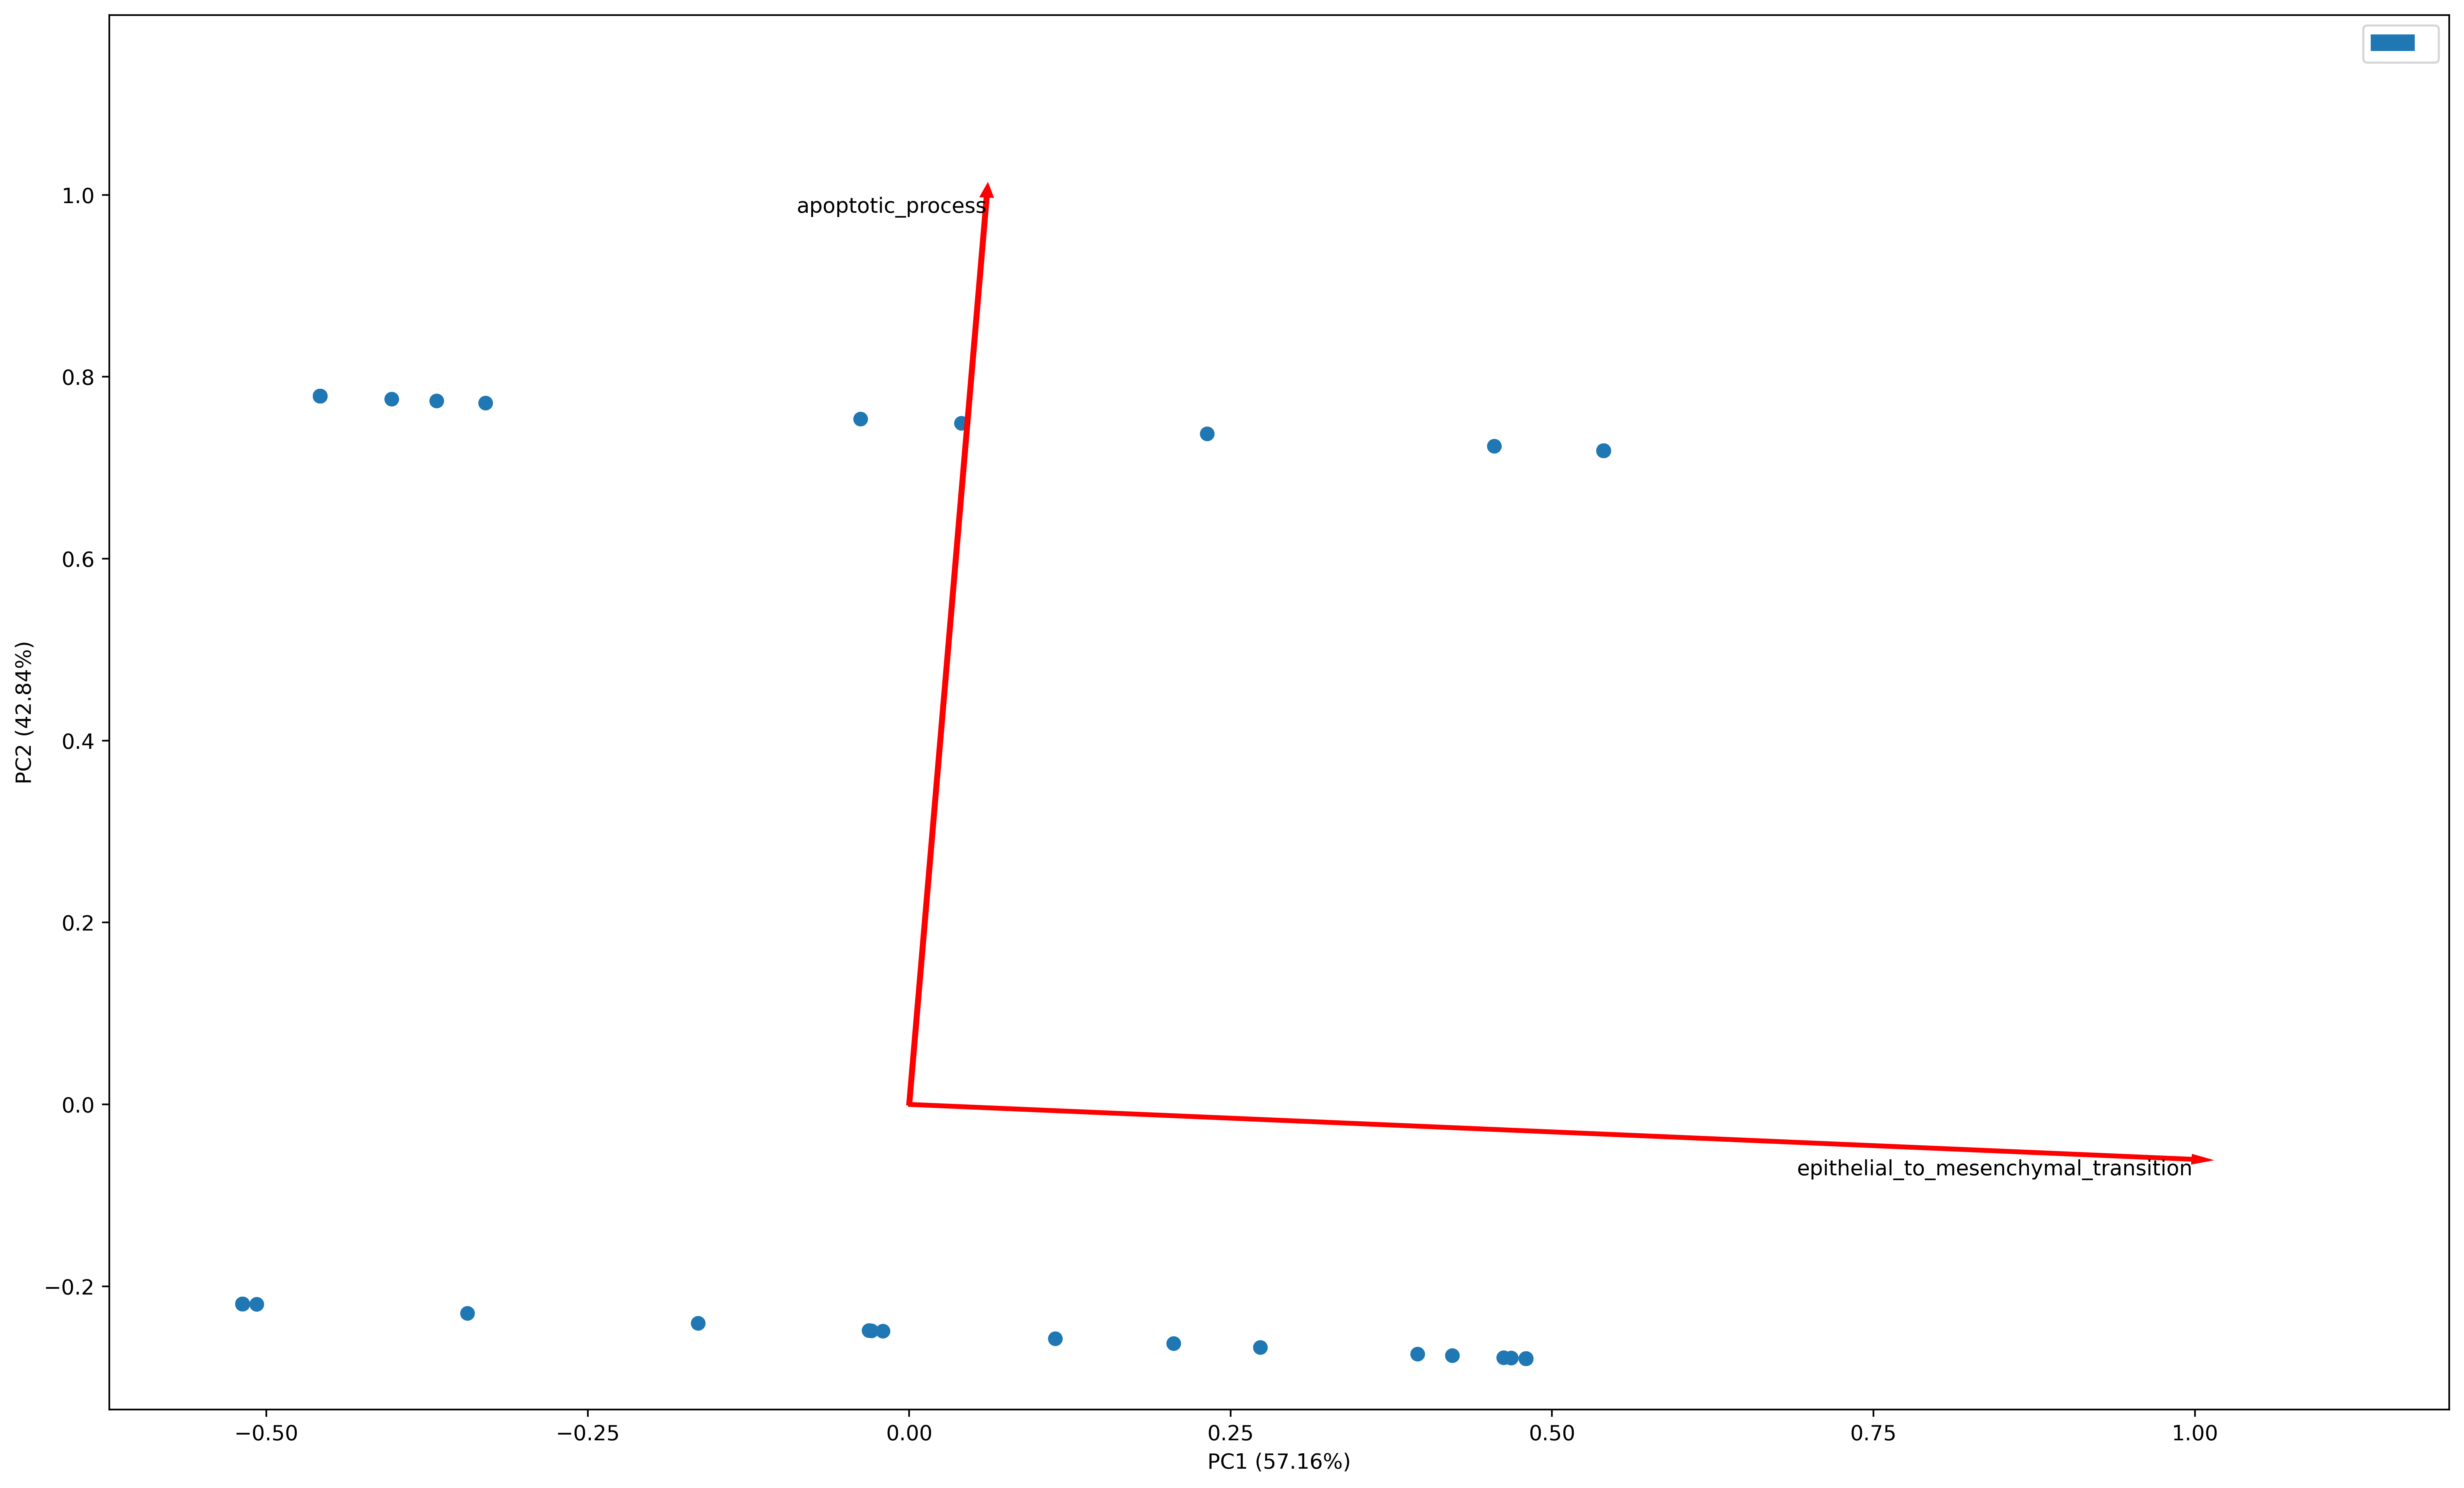

In [30]:
results.plotSteadyStatesNodesDistribution()

# Testing the model built after manual curation

In [2]:
model_individual = maboss.loadBNet("../sif_files/Invasion_net_1.bnet")

In [3]:
model_individual.param["max_time"]=100
model_individual.param["thread_count"]=14

In [22]:
maboss.set_output(model_individual, ["apoptotic_process", "epithelial_to_mesenchymal_transition", "cell_division"])

In [5]:
maboss.set_output(model_individual, model_individual.network.keys())

In [27]:
biolqm_model = maboss.to_biolqm(model_individual)
fps = biolqm.fixpoints(biolqm_model)
print(len(fps), "fixpoints") # shows the number of fixpoints

0 fixpoints


In [ ]:
# Getting the list of nodes
nodes = list(fps[0].keys())
# Building a 2D numpy array with the nodes order defined above, with each fixpoint value
data = np.array([[fp[node] for node in nodes] for fp in fps])
# The array is XX fixpoints * XX nodes
data.shape
from sklearn import decomposition
from sklearn.decomposition import PCA
#pca = PCA(n_components=3)
#pca_out = pca.fit(data)
from pandas import DataFrame
# training the PCA
pca = decomposition.PCA()
pca.fit(data)
# getting the weights for original parameters
for i in range(0,3):
featureWeights = list(pca.components_[i])
weights = DataFrame(data = featureWeights)
filename = 'principal_component_' + str(i) + '.txt'
#
weights.to_csv(filename, sep = '\t')
# Uncomment the last function if you wish to create the files of the weights
# Here the weights show that for PC1, RTK, p21, pRB, p27, MCL1, BCL2, BCLXL, IAPs contribute to 20% each
# For PC2, TRAIL and DR4_5 contribute negatively (-70%)
# For PC3, GF and GF_High contribute to 70%
## Visualise the results in the form of a graph
# Getting the new coordinates
X_pca = pca.transform(data)
# Plotting the steady states
plt.figure(figsize=(3, 4), dpi=200)
plt.plot(X_pca[:, 0], X_pca[:, 1], ".")
# Printing arrows, but there is too much. We need to select some nodes
#some_nodes = ["EGFR", "TP53","CDK1"]
some_nodes = ["Cell_growth", "Apoptosis","EMT"]
for some_node in some_nodes:
v = pca.components_[0:2, nodes.index(some_node)].T
plt.arrow(0, 0, v[0], v[1], color='red', width=0.01)
plt.text(v[0], v[1], some_node, color='black', ha='center', va='center', fontsize=5)
plt.xlabel("PC1: %.0f%% variance explained" % (pca.explained_variance_ratio_[0]*100))
plt.ylabel("PC2: %.0f%% variance explained" % (pca.explained_variance_ratio_[1]*100))

In [21]:
for node in model_individual.network.keys():
    model_individual.network.set_istate(node, [0.5, 0.5])

In [79]:
input_nodes = ["FN1", "LAMC1"]

In [80]:
for node in input_nodes:
    model_individual.network.set_istate(node, [0,1])

In [23]:
result = model_individual.run()

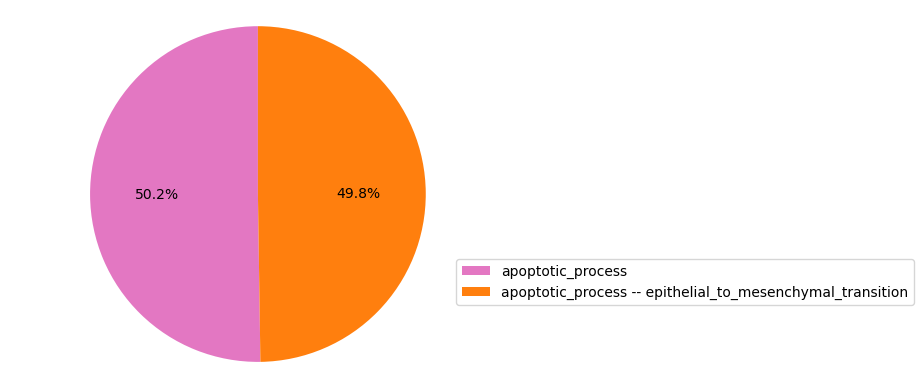

In [24]:
result.plot_piechart()

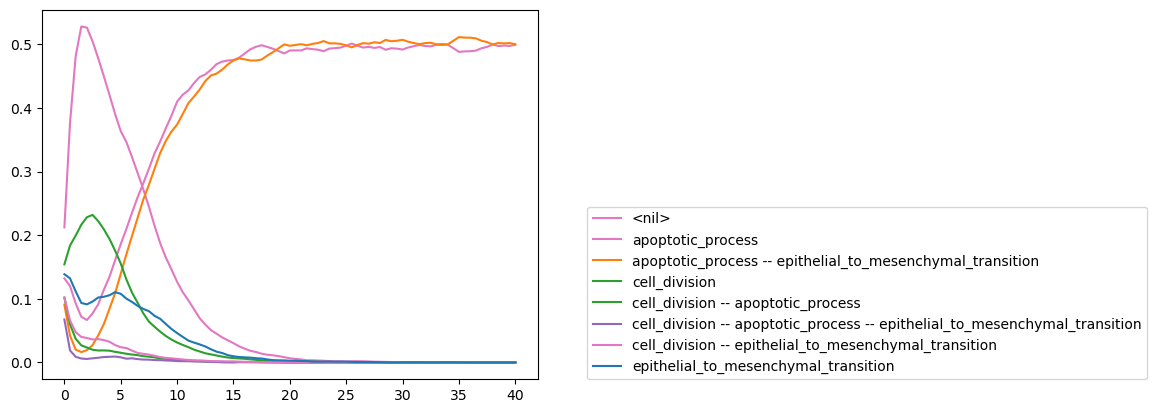

In [25]:
result.plot_trajectory(until=40)

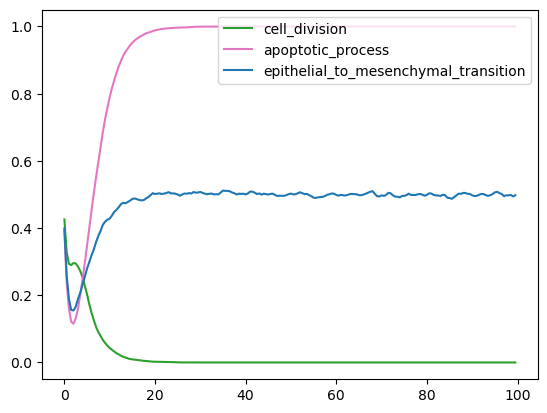

In [26]:
result.plot_node_trajectory()

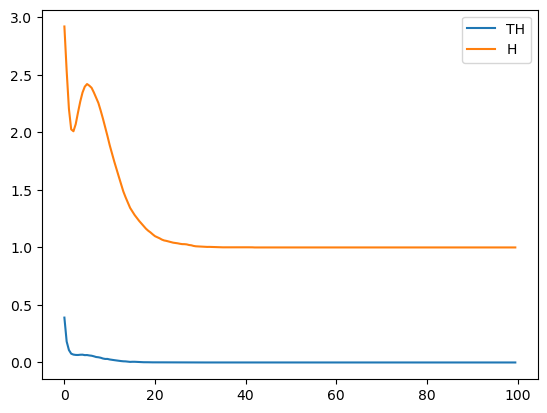

In [28]:
result.plot_entropy_trajectory()

In [37]:
result.nd_probtraj

,apoptotic_process,cell_division,epithelial_to_mesenchymal_transition
0.0,0.392767,0.425801,0.399055
0.5,0.240908,0.328808,0.259345
1.0,0.159451,0.293358,0.188740
1.5,0.121259,0.290015,0.156369
2.0,0.115302,0.295890,0.154781
...,...,...,...
97.5,1.000000,0.000000,0.497704
98.0,1.000000,0.000000,0.497157
98.5,1.000000,0.000000,0.498693
99.0,1.000000,0.000000,0.494296


In [39]:
result.get_fp_file()

'/tmp/tmpvkxny1vs/res_fp.csv'